In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ucitavanje i sredivanje dataseta

### Ucitavanje svih excel fajlova u jedan dataframe

In [2]:
new_df = pd.DataFrame()

In [3]:
for i in range(1998,2022):
    df = pd.read_csv('input/atp_matches_' + str(i) + '.csv')
    df['year'] = i
    new_df = pd.concat([new_df,df], axis=0)
new_df.shape

(72003, 50)

In [4]:
for i in range(2010,2022):
    df = pd.read_csv('input/atp_matches_qual_chall_' + str(i) + '.csv')
    df['year'] = i
    new_df = pd.concat([new_df,df], axis=0)
new_df.shape

(156633, 50)

### Provera nedostajucih vrednosti

In [5]:
new_df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'year'],
      dtype='object')

In [6]:
new_df = new_df[~(new_df['tourney_name'].str.contains('Davis'))]

In [7]:
new_df.isna().sum()

tourney_id                 0
tourney_name               0
surface                    0
draw_size                  0
tourney_level              0
tourney_date               0
match_num                  0
winner_id                  0
winner_seed            82231
winner_entry          130111
winner_name                0
winner_hand                8
winner_ht              42382
winner_ioc                 0
winner_age                 8
loser_id                   0
loser_seed            111890
loser_entry           115511
loser_name                 0
loser_hand                42
loser_ht               55282
loser_ioc                  0
loser_age                125
score                     15
best_of                    0
round                      0
minutes                 8708
w_ace                   4276
w_df                    4276
w_svpt                  4276
w_1stIn                 4276
w_1stWon                4276
w_2ndWon                4276
w_SvGms                 4274
w_bpSaved     

In [8]:
surface_list = new_df.surface.unique() #provera podataka o podlozi i brisanje redova sa nedostajucim vrednostima
print(surface_list)
new_df = new_df.dropna(subset=['surface'])
surface_list = new_df.surface.unique()
print(surface_list)

['Hard' 'Carpet' 'Clay' 'Grass']
['Hard' 'Carpet' 'Clay' 'Grass']


In [9]:
new_df.draw_size.unique()

array([ 32, 128,  48,  56,  96,  64,  16,  12,   8,  28,  24,   9],
      dtype=int64)

In [10]:
new_df.loc[new_df['winner_seed'].isna(),'winner_seed'] = 40 #postavljanje reda broja nosioca za one koji nedotaju na 40
new_df.loc[new_df['loser_seed'].isna(), 'loser_seed'] = 40

In [11]:
print(new_df['winner_entry'].unique())
new_df.loc[new_df['winner_entry'].isna(), 'winner_entry'] = 'A'
new_df.loc[new_df['loser_entry'].isna(), 'loser_entry'] = 'A'

[nan 'Q' 'WC' 'LL' 'PR' 'SE' 'ALT' 'Alt' 'S' 'AL' '3)' '1)' '6)' '6) A'
 '5) A' '2) A' 'ITF' 'P' 'I' 'A']


In [12]:
print(new_df[new_df['winner_hand'].isna()].shape[0])
new_df.loc[new_df['winner_hand'].isna(), 'winner_hand'] = 'U'
new_df.loc[new_df['loser_hand'].isna(), 'loser_hand'] = 'U'
new_df['winner_hand'].unique()

8


array(['R', 'L', 'U'], dtype=object)

In [13]:
#postavljanje visine gde nedostaje na na prosecnu visinu pobednika, odnosno gubitnika
w_ht = new_df['winner_ht'].mean()
print('Prosecna visina pobednika: ' + str(w_ht))
new_df.loc[new_df['winner_ht'].isna(), 'winner_ht'] = w_ht
l_ht = new_df['loser_ht'].mean()
print('Prosecna visina gubitnika: ' + str(l_ht))
new_df.loc[new_df['loser_ht'].isna(), 'loser_ht'] = l_ht

Prosecna visina pobednika: 185.60925093319184
Prosecna visina gubitnika: 185.29204354311466


In [14]:
#postavljanje starosti igraca gde nedostaje na na prosecnu starost pobednika, odnosno gubitnika
w_age = new_df['winner_age'].mean() 
print('Prosecna starost pobdenika: ' + str(w_age))
new_df.loc[new_df['winner_age'].isna(), 'winner_age'] = w_age
l_age = new_df['loser_age'].mean()
print('Prosecna starost gubitnika' + str(l_age))
new_df.loc[new_df['loser_age'].isna(), 'loser_age'] = l_age

Prosecna starost pobdenika: 26.000386412709297
Prosecna starost gubitnika25.85686553617736


In [15]:
#postavljanje ranka na 2000, sto veci rank igrac je losiji
new_df.loc[new_df['winner_rank'].isna(), 'winner_rank'] = 2000
new_df.loc[new_df['loser_rank'].isna(), 'loser_rank'] = 2000

In [16]:
# postavljanje broja bodova na 0
new_df.loc[new_df['winner_rank_points'].isna(), 'winner_rank_points'] = 0
new_df.loc[new_df['loser_rank_points'].isna(), 'loser_rank_points'] = 0

In [17]:
# brisanje meceva koji nemaju rezultat
new_df.score.unique()
new_df = new_df.dropna(subset=['score'])
new_df = new_df.loc[new_df['score'] != 'W/O']

In [18]:
# runda turnira nema nedostajucu vrednost tako da ostaje netaknuta
new_df['round'].unique()

array(['R32', 'R16', 'QF', 'SF', 'F', 'R128', 'R64', 'RR', 'BR', 'ER',
       'Q1', 'Q2', 'Q3'], dtype=object)

In [19]:
# brisemo meceve koji nemaju duzinu trajanja
new_df = new_df.loc[~(new_df['minutes'].isna()) & (new_df['minutes']!=0)]

In [20]:
new_df.isna().sum()

tourney_id              0
tourney_name            0
surface                 0
draw_size               0
tourney_level           0
tourney_date            0
match_num               0
winner_id               0
winner_seed             0
winner_entry            0
winner_name             0
winner_hand             0
winner_ht               0
winner_ioc              0
winner_age              0
loser_id                0
loser_seed              0
loser_entry             0
loser_name              0
loser_hand              0
loser_ht                0
loser_ioc               0
loser_age               0
score                   0
best_of                 0
round                   0
minutes                 0
w_ace                 534
w_df                  534
w_svpt                534
w_1stIn               534
w_1stWon              534
w_2ndWon              534
w_SvGms               534
w_bpSaved             534
w_bpFaced             534
l_ace                 534
l_df                  534
l_svpt      

In [21]:
# brisemo sve redove gde su ne popunjene numericke vrednosti, broj aseva, duplih gresaka..
new_df = new_df.dropna()

In [22]:
new_df.isna().sum()

tourney_id            0
tourney_name          0
surface               0
draw_size             0
tourney_level         0
tourney_date          0
match_num             0
winner_id             0
winner_seed           0
winner_entry          0
winner_name           0
winner_hand           0
winner_ht             0
winner_ioc            0
winner_age            0
loser_id              0
loser_seed            0
loser_entry           0
loser_name            0
loser_hand            0
loser_ht              0
loser_ioc             0
loser_age             0
score                 0
best_of               0
round                 0
minutes               0
w_ace                 0
w_df                  0
w_svpt                0
w_1stIn               0
w_1stWon              0
w_2ndWon              0
w_SvGms               0
w_bpSaved             0
w_bpFaced             0
l_ace                 0
l_df                  0
l_svpt                0
l_1stIn               0
l_1stWon              0
l_2ndWon        

In [23]:
new_df.to_csv('new_data/tenis.csv', index=False)

### Analiza podataka

In [24]:
#provera koliko pobeda ima Novak Djokovic
djokovic_id = new_df[new_df['winner_name'] == 'Novak Djokovic']['winner_id'].unique()[0]  
print('Broj pobeda Novaka Djokovica je ' + str(new_df[new_df['winner_id']==djokovic_id].shape[0]))

Broj pobeda Novaka Djokovica je 896


In [25]:
print('Broj razlicitih pobednika je ' + str(new_df['winner_id'].nunique())) #broj igraca koji su odneli pobedu

Broj razlicitih pobednika je 2634


In [26]:
print('Ukupan broj igraca ' + str((new_df['winner_id']+new_df['loser_id']).nunique())) #broj igraca koji su odneli pobedu

Ukupan broj igraca 29362


In [27]:
# Poredjenje odnosa ranka i procenat koliko je igraca pobedilo bolje rangiranog
print('Broj pobednika sa vecim rangom je  ' + str(new_df[new_df['loser_rank'] > new_df['winner_rank']].shape[0]))
print('Broj pobednika sa losijim rangom je ' + str(new_df[new_df['loser_rank'] < new_df['winner_rank']].shape[0]))
print('Procenat pobednika sa losijim rangom je ' + str(new_df[new_df['loser_rank'] > new_df['winner_rank']].shape[0] * 100 / new_df.shape[0]))



Broj pobednika sa vecim rangom je  90605
Broj pobednika sa losijim rangom je 49665
Procenat pobednika sa losijim rangom je 64.47377784103038


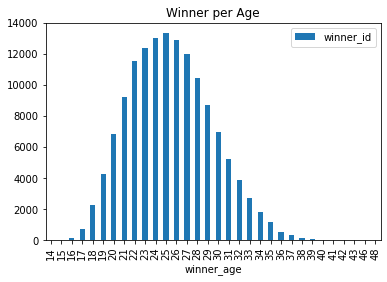

In [28]:
y = new_df[['winner_age', 'winner_id']].astype(int).groupby('winner_age').count().plot(kind='bar', title='Winner per Age')

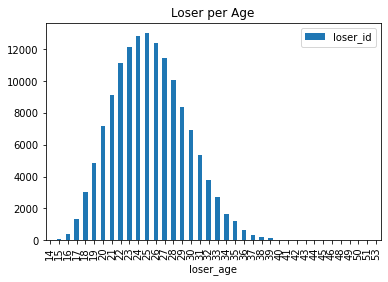

In [29]:
y = new_df[['loser_age', 'loser_id']].astype(int).groupby('loser_age').count().plot(kind='bar', title='Loser per Age')

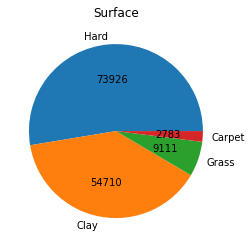

In [30]:
surface = new_df['surface'].value_counts()
def absolute_value(val):
    a = int(np.round(val/100.*surface.sum(),0))
    return a
plt.title('Surface')
plt.pie(surface, labels=surface.index, autopct=absolute_value)
plt.show()

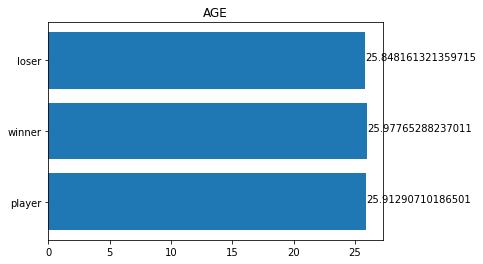

Najstariji pobednik 48.974674880200006, najmladji pobednik 14.798083504400001
Najstariji gubitnik 53.9329226557, najmladji gubitnik 14.4147843943
Najstariji igrac 53.9329226557, najmladji igrac 14.4147843943


In [31]:
ages_name = ['player', 'winner', 'loser']
player_age = sum(new_df['winner_age'].to_list()+new_df['loser_age'].to_list())/len(new_df['winner_age'].to_list()+new_df['loser_age'].to_list())
winner_age = (new_df['winner_age']).mean()
loser_age = (new_df['loser_age']).mean()
ages_size = [player_age, winner_age, loser_age]


plt.title('AGE')
plt.barh(ages_name,ages_size)
for index, value in enumerate(ages_size):
    plt.text(value, index, str(value))
plt.show()

older_winner = (new_df['winner_age']).max()
younger_winner =  (new_df['winner_age']).min()

older_loser = (new_df['loser_age']).max()
younger_loser =  (new_df['loser_age']).min()

older_player =max(new_df['winner_age'].to_list()+new_df['loser_age'].to_list())
younger_player =min(new_df['winner_age'].to_list()+new_df['loser_age'].to_list())


print(f'Najstariji pobednik {older_winner}, najmladji pobednik {younger_winner}')
print(f'Najstariji gubitnik {older_loser}, najmladji gubitnik {younger_loser}')
print(f'Najstariji igrac {older_player}, najmladji igrac {younger_player}')


In [32]:
minutes = new_df['minutes'].mean()
max_minutes = new_df['minutes'].max()
min_minutes = new_df['minutes'].min()


print(f'Prosecna duzina {minutes}, maksimalna duzina meca {max_minutes}, minimalna duzina meca {min_minutes}')

Prosecna duzina 98.85393154486586, maksimalna duzina meca 4756.0, minimalna duzina meca 1.0


Winner hand
R    116757
L     18322
U      5451
Name: winner_hand, dtype: int64
Loser hand
R    112370
L     17886
U     10274
Name: loser_hand, dtype: int64


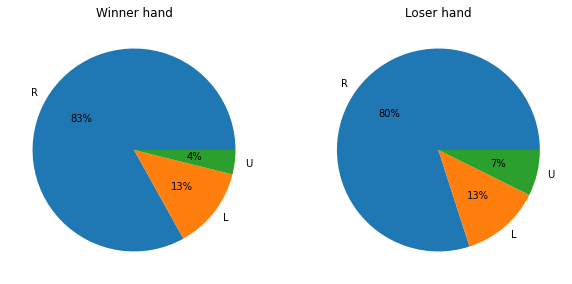

In [33]:
winner_hand = new_df['winner_hand'].value_counts()
loser_hand = new_df['loser_hand'].value_counts()
print('Winner hand')
print(winner_hand)
print('Loser hand')
print(loser_hand)
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1) 
plt.title('Winner hand')
plt.pie(winner_hand, labels=winner_hand.index, autopct = '%.0f%%')
plt.subplot(1, 2, 2) 
plt.title('Loser hand')
plt.pie(loser_hand, labels=loser_hand.index, autopct = '%.0f%%')
plt.show()

In [34]:
best = new_df['winner_id'].value_counts().index[0]
best_player = new_df.loc[new_df.winner_id == best]['winner_name'].unique()
print(f'Igrac sa najvise pobeda {best_player[0]}')

Igrac sa najvise pobeda Roger Federer


In [35]:
worst = new_df['loser_id'].value_counts().index[0]
worst_player = new_df.loc[new_df.loser_id == worst]['loser_name'].unique()
print(f'Igrac sa najvise gubitaka {worst_player[0]}')

Igrac sa najvise gubitaka Feliciano Lopez


<BarContainer object of 10 artists>

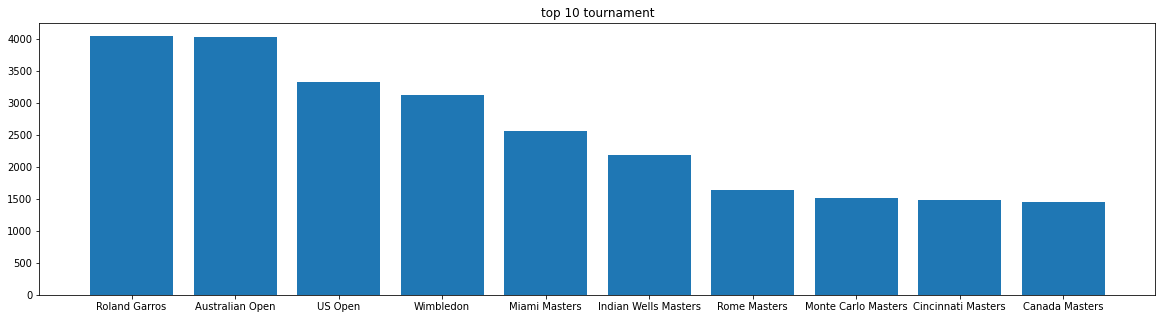

In [36]:
tournament_most = new_df['tourney_name'].value_counts()
plt.figure(figsize=(20,5))
plt.title('top 10 tournament')
plt.bar(tournament_most.index[0:10],tournament_most[0:10])

<BarContainer object of 10 artists>

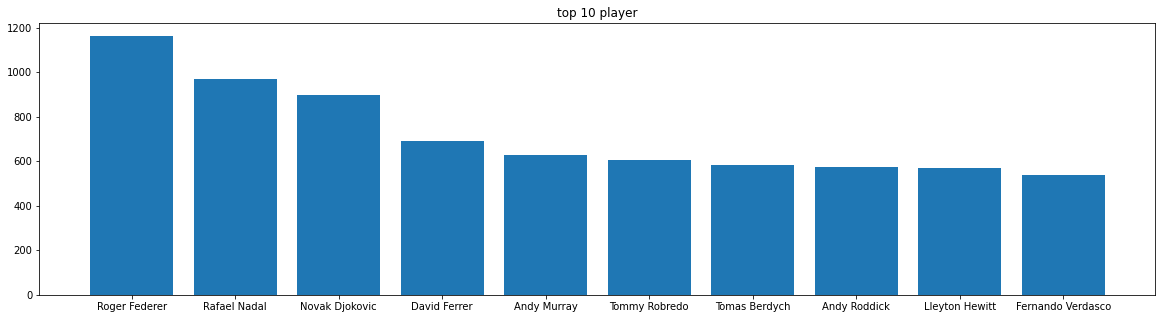

In [38]:
player_most = new_df['winner_name'].value_counts()
plt.figure(figsize=(20,5))
plt.title('top 10 player')
plt.bar(player_most.index[0:10],player_most[0:10])